# Data Augmentation

In [1]:
#!python -m pip install numpy
#!python -m pip install pandas
#!python -m pip install torch
#!python -m pip install matplotlib
#!python -m pip install sklearn
#!python -m pip install torchvision
#!python -m pip install tqdm
#!python -m pip install opencv-python
#!python -m pip install albumentations

import numpy as np
import pandas as pd
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib
import tqdm.auto as tqdm

import os
from PIL import Image
from sklearn.metrics import accuracy_score
import torchvision
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader

plt.style.use('seaborn')

import DiagnosisFunctions.tools as tools

import albumentations as A
import torchvision.transforms.functional as TF

In [2]:
(trainpath, traintarget), _, _, le = tools.get_splits()

train_transform = A.Compose(
    [
        A.SmallestMaxSize(max_size=160),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
    ]
)

trainset    = tools.DiagnosisDataset(path = trainpath, target = traintarget, size = [200, 200])#, transform = train_transform)
trainloader = DataLoader(trainset, batch_size=16)

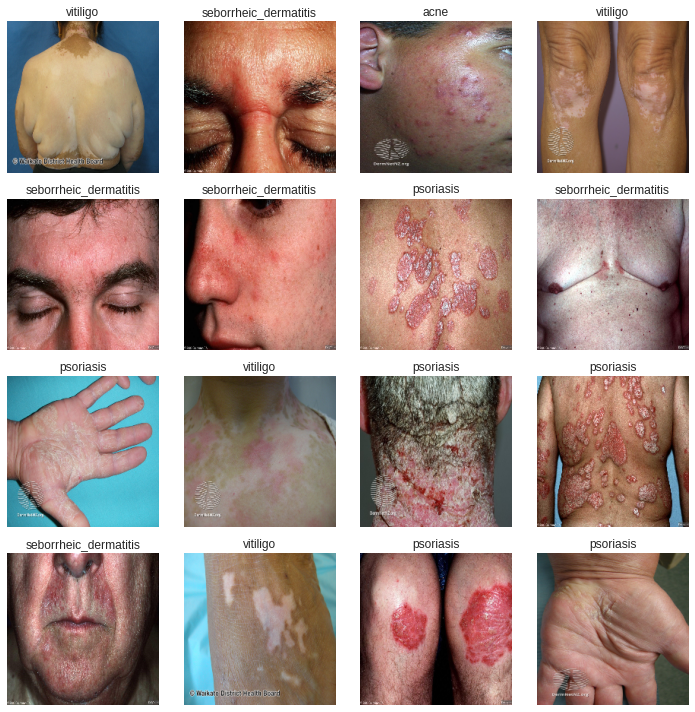

In [5]:
fig, axs = plt.subplots(nrows = 4, ncols = 4, figsize=(10,10))
axs = axs.flatten()

for k, ax in enumerate(axs):
    im, target = trainset.__getitem__(k)
    ax.imshow(im.permute(1,2,0))
    ax.axis('off')
    ax.set_title(le.inverse_transform([target])[0])

plt.tight_layout()